In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import DBSCAN


In [20]:
df = pd.read_csv("cleanedSample.csv",low_memory=False)

In [21]:
df

,Longitude,Latitude,Street,Day,Violation Code
0,49.892600,-97.153600,Spence ST,Tuesday,P30
1,49.889300,-97.147600,St Mary AVE,Tuesday,P64
2,49.839515,-97.151106,LOT72-1360 PEMBINA,Tuesday,16
3,49.893690,-97.153870,Spence ST,Wednesday,P05
4,49.898700,-97.133400,James AVE,Friday,P02
...,...,...,...,...,...
99995,49.903700,-97.166100,Notre Dame AVE,Monday,P03
99996,49.891700,-97.142800,Donald ST,Tuesday,P03
99997,49.885200,-97.141900,Carlton ST,Tuesday,P01
99998,49.892800,-97.154900,Ellice AVE,Thursday,P03


In [22]:
# Select the columns to encode
columns_to_encode = ['Day', 'Violation Code', 'Street']

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore',dtype=np.bool_)

# Fit the encoder to the data
encoder.fit(df[columns_to_encode])

# Transform the data
encoded_data = encoder.transform(df[columns_to_encode])

# Create column names for the encoded data
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

encoded_columns_df = pd.DataFrame(encoded_data, columns=encoded_columns)

encoded_columns_df = encoded_columns_df.astype(np.bool_)

In [23]:
encoded_columns_df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_10,Violation Code_11,...,Street_Yanofsky WAY,Street_Yardley ST,Street_Yarmouth COVE,Street_Yarwood AVE,Street_Yeomans ST,Street_York AVE,Street_York Valley Way,Street_Yorkwood DR,Street_Young ST,Street_Zawaly BAY
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df = df[['Longitude','Latitude']]
df = df.astype(np.float16)
encoded_columns_df["Latitude"] = df["Latitude"]
encoded_columns_df["Longitude"] = df["Longitude"]

In [24]:
df = encoded_columns_df
df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_10,Violation Code_11,...,Street_Yanofsky WAY,Street_Yardley ST,Street_Yarmouth COVE,Street_Yarwood AVE,Street_Yeomans ST,Street_York AVE,Street_York Valley Way,Street_Yorkwood DR,Street_Young ST,Street_Zawaly BAY
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
numericalCols = ["Longitude","Latitude"]
numericalData = df[numericalCols]

# standardize the numerical data to have a mean of 0 and a variance of 1
scaler = StandardScaler()
numericalDataScaled = scaler.fit_transform(numericalData)
df[numericalCols] = numericalDataScaled
df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_10,Violation Code_11,...,Street_Yarmouth COVE,Street_Yarwood AVE,Street_Yeomans ST,Street_York AVE,Street_York Valley Way,Street_Yorkwood DR,Street_Young ST,Street_Zawaly BAY,Latitude,Longitude
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,0.584961
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,-0.569824
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,-1.724609
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,0.584961
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,0.584961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.273438,0.584961
99996,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,0.584961
99997,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,-0.569824
99998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.367188,0.584961


In [25]:
# create a DBSCAN object and fit the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df)

# add the cluster labels to the original dataframe
df['Clusters'] = dbscan.labels_


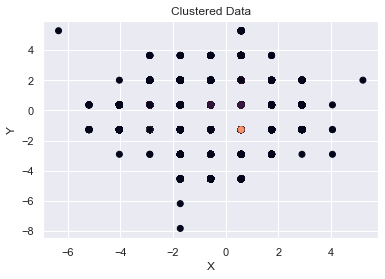

In [18]:
plt.scatter(df['Longitude'], df['Latitude'], c=df["Clusters"])
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [26]:
df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Violation Code_1,Violation Code_10,Violation Code_11,...,Street_Yardley ST,Street_Yarmouth COVE,Street_Yarwood AVE,Street_Yeomans ST,Street_York AVE,Street_York Valley Way,Street_Yorkwood DR,Street_Young ST,Street_Zawaly BAY,Clusters
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,2
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2941
99996,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,929
99997,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,546
99998,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2094


In [27]:
decoded_data = encoder.inverse_transform(encoded_data)
decoded_data

array([['Tuesday', 'P30', 'Spence ST'],
       ['Tuesday', 'P64', 'St Mary AVE'],
       ['Tuesday', '16', 'LOT72-1360 PEMBINA'],
       ...,
       ['Tuesday', 'P01', 'Carlton ST'],
       ['Thursday', 'P03', 'Ellice AVE'],
       ['Tuesday', 'P05', 'Young ST']], dtype=object)

In [29]:
decodedDf= pd.DataFrame(decoded_data,columns=["Day","Violation Code","Street"])
decodedDf["Cluster"]=df["Clusters"]
decodedDf

,Day,Violation Code,Street,Cluster
0,Tuesday,P30,Spence ST,0
1,Tuesday,P64,St Mary AVE,1
2,Tuesday,16,LOT72-1360 PEMBINA,-1
3,Wednesday,P05,Spence ST,2
4,Friday,P02,James AVE,3
...,...,...,...,...
99995,Monday,P03,Notre Dame AVE,2941
99996,Tuesday,P03,Donald ST,929
99997,Tuesday,P01,Carlton ST,546
99998,Thursday,P03,Ellice AVE,2094
